In [2]:
#Required Libraries
import IPython.display as ipd
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam

In [ ]:
ipd.Audio('/content/drive/My Drive/colab_notebook/Train/123.wav')

In [ ]:
data = pd.read_csv('/content/drive/My Drive/colab_notebook/train.csv')

## Extracting Features from audio files using Librosa library.

In [ ]:
mfc=[]
chr=[]
me=[]
ton=[]
lab=[]
for i in tqdm(range(len(data))):
    f_name='/content/drive/My Drive/colab_notebook/Train/'+str(data.ID[i])+'.wav'
    X, s_rate = librosa.load(f_name, res_type='kaiser_fast')
    mf = np.mean(librosa.feature.mfcc(y=X, sr=s_rate).T,axis=0)
    mfc.append(mf)
    l=data.Class[i]
    lab.append(l)
    try:
        t = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),
        sr=s_rate).T,axis=0)
        ton.append(t)
    except:
        print(f_name)  
    m = np.mean(librosa.feature.melspectrogram(X, sr=s_rate).T,axis=0)
    me.append(m)
    s = np.abs(librosa.stft(X))
    c = np.mean(librosa.feature.chroma_stft(S=s, sr=s_rate).T,axis=0)
    chr.append(c)

  2%|▏         | 101/5434 [03:26<2:31:23,  1.70s/it]/usr/local/lib/python3.6/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')
  4%|▎         | 193/5434 [06:04<3:16:13,  2.25s/it]/usr/local/lib/python3.6/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')
  5%|▍         | 254/5434 [07:46<2:25:50,  1.69s/it]/usr/local/lib/python3.6/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')
 12%|█▏        | 642/5434 [18:51<2:30:14,  1.88s/it]/usr/local/lib/python3.6/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty f

In [ ]:
# Saving each feature seperately. This is important as extracting features takes lot of time
mfcc = pd.DataFrame(mfc)
mfcc.to_csv('/content/drive/My Drive/colab_notebook/mfc.csv', index=False)
chrr = pd.DataFrame(chr)
chrr.to_csv('/content/drive/My Drive/colab_notebook/chr.csv', index=False)
mee = pd.DataFrame(me)
mee.to_csv('/content/drive/My Drive/colab_notebook/me.csv', index=False)
tonn = pd.DataFrame(ton)
tonn.to_csv('/content/drive/My Drive/colab_notebook/ton.csv', index=False)
la = pd.DataFrame(lab)
la.to_csv('/content/drive/My Drive/colab_notebook/labels.csv', index=False)

In [ ]:
# Concatenating each feature into one
features = []
for i in range(len(ton)):
    features.append(np.concatenate((me[i], mfc[i], 
                ton[i], chr[i]), axis=0))

In [ ]:
# Saving the feature
fea = pd.DataFrame(features)
fea.to_csv('/content/drive/My Drive/colab_notebook/features2.csv', index=False)

In [ ]:
features[:5]

[array([ 5.87741147e+00,  2.03400055e+01,  5.20882544e+01,  3.82308732e+01,
         1.04358532e+01,  9.48950787e+00,  1.40702085e+01,  1.35314175e+01,
         9.39526087e+00,  9.96568527e+00,  5.37765132e+00,  3.79181013e+00,
         3.71445010e+00,  2.82227077e+00,  1.61040773e+00,  1.56574186e+00,
         9.82281904e-01,  1.23214937e+00,  1.76903991e+00,  2.17230448e+00,
         2.77280527e+00,  3.52520095e+00,  4.57532074e+00,  5.85333321e+00,
         5.62675686e+00,  4.19302596e+00,  4.34025295e+00,  4.35974630e+00,
         4.52183210e+00,  4.63086433e+00,  4.12339541e+00,  4.10912472e+00,
         4.67090422e+00,  2.93450089e+00,  2.37400418e+00,  3.21428591e+00,
         3.68173188e+00,  2.84259578e+00,  2.08244969e+00,  3.19499127e+00,
         2.68541122e+00,  3.65219996e+00,  3.59352464e+00,  3.19034831e+00,
         1.83373043e+00,  1.51016134e+00,  1.37550896e+00,  1.64187208e+00,
         1.90376876e+00,  1.64665538e+00,  1.60339475e+00,  2.41152671e+00,
         1.6

In [ ]:
len(features)

5434

In [ ]:
features.shape

(5434, 186)

In [ ]:
# Encoding
la = pd.get_dummies(lab)

In [ ]:
label_columns=la.columns

In [ ]:
target = la.to_numpy()

In [ ]:
target.shape

(5434, 10)

In [ ]:
# normalize the features
tran = StandardScaler()
features_train = tran.fit_transform(features)

In [40]:
# Train, validation and test data
feat_train=features_train[:4434]
target_train=target[:4434]
y_train=features_train[4434:5330]
y_val=target[4434:5330]
test_data=features_train[5330:]
test_label=lab['0'][5330:]

In [41]:
print("Training",feat_train.shape)
print(target_train.shape)
print("Validation",y_train.shape)
print(y_val.shape)
print("Test",test_data.shape)
print(test_label.shape)

Training (4434, 186)
(4434, 10)
Validation (896, 186)
(896, 10)
Test (104, 186)
(104,)


In [27]:
# Model

model = Sequential()

model.add(Dense(186, input_shape=(186,), activation = 'relu'))

model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.6))

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [28]:
history = model.fit(feat_train, target_train, batch_size=64, epochs=30, 
                    validation_data=(y_train, y_val))

Epoch 1/30
70/70 [==============================] - 0s 5ms/step - loss: 2.0671 - accuracy: 0.2668 - val_loss: 1.4931 - val_accuracy: 0.5658
Epoch 2/30
70/70 [==============================] - 0s 3ms/step - loss: 1.4886 - accuracy: 0.5038 - val_loss: 1.0647 - val_accuracy: 0.6775
Epoch 3/30
70/70 [==============================] - 0s 4ms/step - loss: 1.1262 - accuracy: 0.6243 - val_loss: 0.8565 - val_accuracy: 0.7388
Epoch 4/30
70/70 [==============================] - 0s 4ms/step - loss: 0.9209 - accuracy: 0.7050 - val_loss: 0.7130 - val_accuracy: 0.7902
Epoch 5/30
70/70 [==============================] - 0s 4ms/step - loss: 0.7458 - accuracy: 0.7648 - val_loss: 0.6245 - val_accuracy: 0.8025
Epoch 6/30
70/70 [==============================] - 0s 4ms/step - loss: 0.6564 - accuracy: 0.7844 - val_loss: 0.5760 - val_accuracy: 0.8270
Epoch 7/30
70/70 [==============================] - 0s 4ms/step - loss: 0.5750 - accuracy: 0.8187 - val_loss: 0.5134 - val_accuracy: 0.8326
Epoch 8/30
70/70 [==

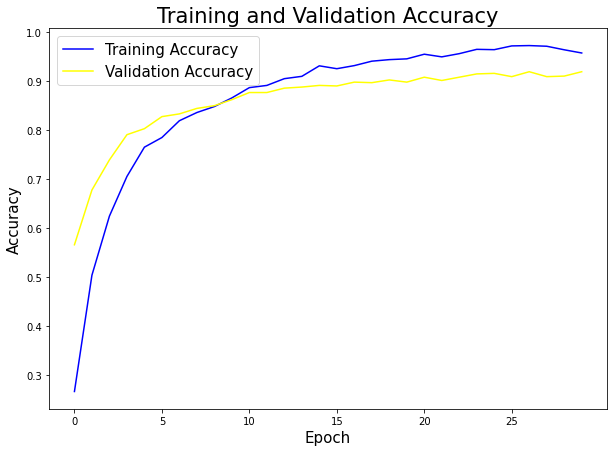

In [30]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Set figure size.
plt.figure(figsize=(10, 7))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_acc, label='Training Accuracy', color='blue')
plt.plot(val_acc, label='Validation Accuracy', color='yellow')

# Set title
plt.title('Training and Validation Accuracy', fontsize = 21)
plt.xlabel('Epoch', fontsize = 15)
plt.legend(fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.xticks(range(0,30,5), range(0,30,5));

In [43]:
# To predict the labels of test data
predict = model.predict_classes(test_data)

In [44]:
# Output
predict

array([7, 0, 0, 3, 3, 4, 0, 8, 1, 1, 4, 8, 7, 4, 8, 8, 9, 4, 8, 0, 5, 3,
       8, 3, 4, 7, 6, 4, 0, 3, 6, 4, 1, 4, 0, 2, 5, 8, 2, 3, 8, 0, 2, 8,
       7, 3, 5, 8, 3, 8, 4, 8, 3, 6, 3, 0, 9, 2, 3, 8, 4, 0, 8, 3, 8, 7,
       0, 4, 5, 7, 1, 9, 4, 9, 9, 1, 5, 0, 9, 0, 6, 8, 7, 8, 6, 9, 9, 3,
       7, 9, 5, 8, 2, 7, 3, 5, 5, 9, 2, 5, 3, 5, 5, 0])

In [35]:
label_columns

Index(['air_conditioner', 'car_horn', 'children_playing', 'dog_bark',
       'drilling', 'engine_idling', 'gun_shot', 'jackhammer', 'siren',
       'street_music'],
      dtype='object')

In [47]:
# To match the labels
prediction=[]
for i in predict:
  j=label_columns[i]
  prediction.append(j)

In [68]:
# Predicted Labels of test data
prediction

['jackhammer',
 'air_conditioner',
 'air_conditioner',
 'dog_bark',
 'dog_bark',
 'drilling',
 'air_conditioner',
 'siren',
 'car_horn',
 'car_horn',
 'drilling',
 'siren',
 'jackhammer',
 'drilling',
 'siren',
 'siren',
 'street_music',
 'drilling',
 'siren',
 'air_conditioner',
 'engine_idling',
 'dog_bark',
 'siren',
 'dog_bark',
 'drilling',
 'jackhammer',
 'gun_shot',
 'drilling',
 'air_conditioner',
 'dog_bark',
 'gun_shot',
 'drilling',
 'car_horn',
 'drilling',
 'air_conditioner',
 'children_playing',
 'engine_idling',
 'siren',
 'children_playing',
 'dog_bark',
 'siren',
 'air_conditioner',
 'children_playing',
 'siren',
 'jackhammer',
 'dog_bark',
 'engine_idling',
 'siren',
 'dog_bark',
 'siren',
 'drilling',
 'siren',
 'dog_bark',
 'gun_shot',
 'dog_bark',
 'air_conditioner',
 'street_music',
 'children_playing',
 'dog_bark',
 'siren',
 'drilling',
 'air_conditioner',
 'siren',
 'dog_bark',
 'siren',
 'jackhammer',
 'air_conditioner',
 'drilling',
 'engine_idling',
 'jackha